In [3]:
import pandas as pd # La usamos para manejar la base de datos (y también graficar) https://pandas.pydata.org/docs/

import matplotlib.pylab as plt # Herramienta principal de visualización https://matplotlib.org/stable/contents.html
import matplotlib.dates as mdates # Dentro de matplotlib, tenemos una herramienta para manejo de fechas 
import seaborn as sbn # Herramienta complementaria de visualización https://seaborn.pydata.org/


from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets # Podemos ganar interactividad en la misma notebook https://ipywidgets.readthedocs.io/en/latest/

import plotly.express as px # Generamos un html dinámico, compartible, sin necesidad de correr procesos por detrás https://plotly.com/python/

import numpy as np # Siempre resulta que la usamos
from wordcloud import WordCloud # Lo usamos para las nubes de palabras

## Importamos datos
Como hemos hecho en notebooks anteriores, traemos algunas de las bases de datos con las que estamos trabajando.

En este caso, traemos la relativa al proceso de vacunación y su percepción.

In [16]:
filename = "datasets/vacunas_safe.csv"

d_1 = pd.read_csv(filename)

In [17]:
df

,0_seVacunoOEnEnsayo,0_forkEnte,0_forkNarrativa,0_forkVacuna,0_vacunaAplicada,0_preTeDarias,0_preEfectiva,0_preEfectosAdversos,0_mejoraColectivaCercana,0_mejoraColectivaLejana,...,0_ayudaCuidado,0_asistirDesconocidoTareaSimple,0_ayudaDesconocidoEncontrarAlgo,0_timePre,0_timeNarrativa,0_timePost,0_timeTerms,0_share,timestamp,hash
0,0,gubernamental,mejoraColectivaLejana,pfizer,-999,99,99,2,-999,4,...,6,3,6,9119,9581,10600,34162,-999,5/2/2021 12:37:15,-8530867232096866797
1,0,gubernamental,mejoraColectivaCercana,sinopharm,-999,100,74,49,3,-999,...,6,7,6,17393,13507,16723,30151,-999,5/2/2021 12:37:45,5227417009213588659
2,0,gubernamental,mejoraColectivaCercana,sinopharm,-999,98,94,10,1,-999,...,6,6,5,17032,15082,119616,7384,-999,5/2/2021 12:38:49,-218351779332136708
3,0,gubernamental,mejoraColectivaCercana,pfizer,-999,76,88,0,2,-999,...,7,6,2,19117,18796,8994,4069,-999,5/2/2021 12:43:07,-8721146152163509145
4,0,gubernamental,mejoraColectivaLejana,pfizer,-999,100,84,20,-999,3,...,5,7,6,27514,27605,18658,35336,-999,5/2/2021 12:39:21,-5310702376306721267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,0,noGubernamental,riesgoDelVirus,astrazeneca,-999,0,83,11,-999,-999,...,7,7,7,16469,19088,15529,7664,-999,25/3/2021 11:51:44,2860988351921379325
6700,0,noGubernamental,mejoraColectivaLejana,pfizer,-999,100,100,24,-999,4,...,7,6,6,25866,30691,16772,16761,-999,25/3/2021 12:42:13,4420919462057543223
6701,0,noGubernamental,riesgoDeLaVacuna,sputnik,-999,100,100,23,-999,-999,...,7,5,6,25416,26839,15382,27495,-999,25/3/2021 8:52:30,-35520872274298919
6702,0,gubernamental,mejoraColectivaLejana,sputnik,-999,100,98,35,-999,3,...,5,7,5,27809,48981,47813,86277,-999,25/3/2021 8:59:33,-6502270234621144308


In [18]:
"""
Un poco de procesamiento sobre la fecha. La quiero usar y previamente chequié que había un par de datos con la fecha alterada
Básicamente, aparecen dos problemas con las fechas:
  - En algunos casos, aparece un "," en el medio...
  - En otros casos, el mes aparece antes que el día. No entiendo por qué, tal vez gente respondiendo desde otros países o lo que sea
Detecté cuáles eran previamente y por eso, el arreglo lo vamos a hacer sobre aquellos índices malditos... (lo segundo, lo de las comas se lo paso a todas por las dudas)
"""
def cambio_fecha(f):
    f = f.split('/')
    return '/'.join([f[1],f[0],f[2]])

d_1.loc[[3575, 4043, 2130, 1590, 1439, 1121, 1073, 1008,  929,  917,  753, 579,  500,  548,  400,  123], 'timestamp'] = d_1.loc[[3575, 4043, 2130, 1590, 1439, 1121, 1073, 1008,  929,  917,  753, 579,  500,  548,  400,  123],'timestamp'].apply(cambio_fecha) # Aplico la función previamente creada para arreglar aquellas fechas mal formateadas

d_1['timestamp'] = d_1['timestamp'].apply(lambda x : pd.to_datetime(x.replace(',',''), format = '%d/%m/%Y %H:%M:%S')) # Llevo a datetime la columna de fechas ya arreglada                               

# Matplotlib

Matplotlib es uno de los paquetes fundamentales del universo python en lo que respecta a análisis de datos. Si bien tenemos que darnos maña y esforzarnos por customizar las figuras, muchas otras librerías corren matplotlib por detrás, es decir, se basan en ella. Por ejemplo, pandas utiliza esta librería.

Si bien hay muchas formas de generar figuras utilizando matplotlib, creo que está bueno acostumbrarse a usar la siguiente estructura, para poder tener más control sobre la misma:

```
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = ...)
```
Lo que estamos logrando con esto es generar una figura, que tendrá un sólo gráfico (row = 1, col = 1). Pero no sólo eso, sino que estamos generando por separado el objeto figura del objeto axis (ejes).

Dentro de algunos beneficios de hacerlo así, es que depués podemos espeficicar métodos para cada objeto, de forma diferenciada, así también como usar el objeto "ax" para ubicar futuros gráficos.



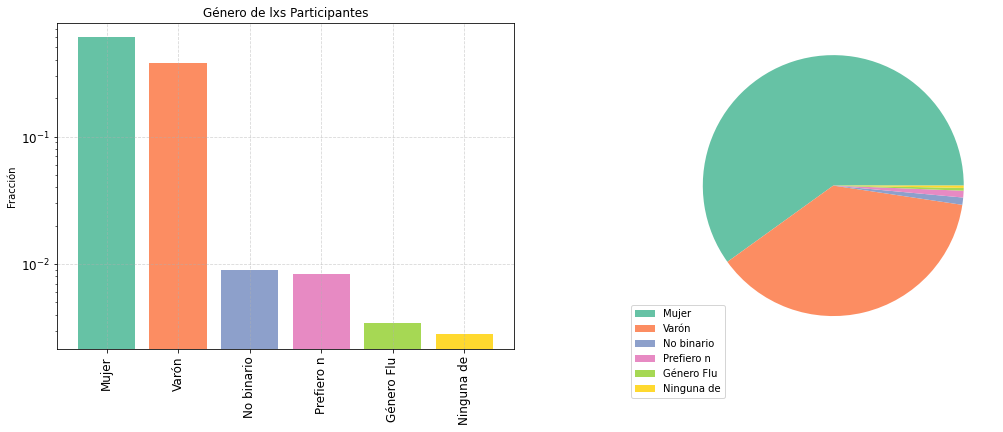

In [31]:
dic_generos = {1: 'Mujer', 2: 'Varón', 3: 'No binario', 4: 'Género Fluido', 5: 'Ninguna de las opciones me identifica', 6 : 'Prefiero no decirlo'} # Esto lo saco de uno de los diccionarios que indican qué significa cada número
generos = d_1['0_genero'].value_counts()

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
axs[0].grid('on', linestyle = 'dashed', alpha = 0.5)
axs[0].set_title('Género de lxs Participantes')
axs[0].set_ylabel('Fracción')
axs[0].bar(x = [i for i in range(len(generos))], # Definimos la ubicación de las barras a lo largo del eje horizontal
           height = generos.values  / generos.values.sum(), # Definimos la altura de las barras
           color = plt.get_cmap('Set2').colors
           )
axs[0].set_xticks([i for i in range(len(generos))])
axs[0].set_xticklabels([dic_generos[g][:10] for g in generos.keys()],
                       rotation = 90)
axs[0].set_yscale('log')

axs[0].tick_params(axis='both', which='major', labelsize = 12)

axs[1].pie(generos.values / generos.values.sum(),
           colors = plt.get_cmap('Set2').colors)
axs[1].legend([dic_generos[g][:10] for g in generos.keys()], loc = (-0.12,-0.15))


plt.show()


Como vemos, la sintaxis utilizada no sólo nos permite ir agregando atributos a axis y figura, sino que además, podemos combinar tipos de gráficos en la misma figura.

Ahora bien, veamos un ejemplo más utilizando el género, pero ahora diferenciando por rango etario. Si bien esto podría hacerse mediante stacked bars u otros, tratemos de hacerlo mediante un radar plot.

### Radar Plot
Lamentablemente, matplotlib no posee una función que rápidamente nos permita armar un radar plot, sino que tenemos que construirla bastante desde cero

In [38]:
genero_segun_edad = d_1.groupby([pd.qcut(d_1['0_edad'], q = 4),'0_genero']).hash.count().unstack(1).rename({i : dic_generos[i][:10] for i in range(1,7)},axis = 1).apply(lambda x: x / x.sum(), axis = 0) # De esta forma, agrupamos por cuartiles de edad y por género

In [39]:
d_1.groupby([pd.qcut(d_1['0_edad'], q = 4),
                                '0_genero']).hash.count().unstack(1).rename({i : dic_generos[i][:10] for i in range(1,7)},
                                                                            axis = 1).apply(lambda x: x / x.sum(), axis = 0)
                                                                          

0_genero,Mujer,Varón,No binario,Género Flu,Ninguna de,Prefiero n
0_edad,,,,,,
"(0.999, 24.0]",0.289447,0.242089,0.400000,0.260870,0.157895,0.285714
"(24.0, 29.0]",0.238427,0.230222,0.300000,0.304348,0.263158,0.267857
"(29.0, 37.0]",0.227974,0.284810,0.266667,0.347826,0.421053,0.250000
"(37.0, 87.0]",0.244151,0.242880,0.033333,0.086957,0.157895,0.196429
